In [52]:
import numpy as np
import matplotlib.pyplot as plt


In [39]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x= np.array([-2,-1,0,1,2])
print("sigmoid:",sigmoid(x))


sigmoid: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]


In [60]:
def relu(x):
  if isinstance(x, np.ndarray):
    return np.maximum(0, x)
  else:
    return max(0, x)
x= np.array([-2,-1,0,1,2])
print("relu:",relu(x))

relu: [0 0 0 1 2]


In [41]:
def mse_loss(y_true, y_pred):
  n=len(y_true)
  return sum((y_pred - y_true)**2)/n

y_true = np.array([3,5,2,8])
y_pred = np.array([2.5, 4.8, 2.1, 7.5])



In [42]:
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

x= np.array([-2,-1,0,1,2])
print("Tanh",tanh(x))


Tanh [-0.96402758 -0.76159416  0.          0.76159416  0.96402758]


In [43]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x), axis=0)

print("softmax:",softmax(x))



softmax: [0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]


In [44]:
def cross_entropy(y_true , y_pred):
  return -np.sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))


In [45]:
def derivative_chainrule(f,x,h=1e-5):
  numerical = (f(x+h)-f(x))
  derivative = numerical/h
  return derivative


In [53]:
print("sigmoid derivative:",derivative_chainrule(sigmoid,x))
print("relu derivative:",derivative_chainrule(relu,x))
print("tanh derivative:",derivative_chainrule(tanh,x))
mse_derivative = derivative_chainrule(lambda y_pred: mse_loss(y_true, y_pred), y_true, y_pred)
print("mse derivative:",mse_derivative)
print("softmax_derivative",softmax(x))

sigmoid derivative: [0.10499399 0.19661239 0.25       0.19661148 0.10499319]
relu derivative: [0. 0. 1. 1. 1.]
tanh derivative: [0.07065151 0.41997754 1.         0.41997114 0.07065014]
mse derivative: [ 8.995       4.68489583 10.70833333  2.99833333]
softmax_derivative [0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]


In [54]:
def plot_chain_rule(f, g, x_range=(-2, 2), title="Đạo hàm Chain Rule"):
    x_vals = np.linspace(x_range[0], x_range[1], 400)

    g_vals = g(x_vals)
    f_vals = f(g_vals)

    f_prime_vals = []
    for g_x in g_vals:
      f_prime_vals.append(calculate_derivative(f, g_x))

    g_prime_vals = []
    for x in x_vals:
      g_prime_vals.append(calculate_derivative(g, x))

    chain_rule_derivative_vals = []
    for f_p, g_p in zip(f_prime_vals, g_prime_vals):
      chain_rule_derivative_vals.append(f_p * g_p)  # Áp dụng quy tắc Chain Rule

    #f_prime_vals = [calculate_derivative(f, g_x) for g_x in g_vals]
    #g_prime_vals = [calculate_derivative(g, x) for x in x_vals]
    #chain_rule_derivative_vals = [f_p * g_p for f_p, g_p in zip(f_prime_vals, g_prime_vals)]

    # Vẽ đồ thị của f(g(x)) và đạo hàm
    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, f_vals, label="f(g(x))", color='blue')
    plt.plot(x_vals, chain_rule_derivative_vals, label="f'(x) theo Chain Rule", color='red', linestyle="--")

    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    plt.xlabel("x")
    plt.ylabel("Giá trị")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()


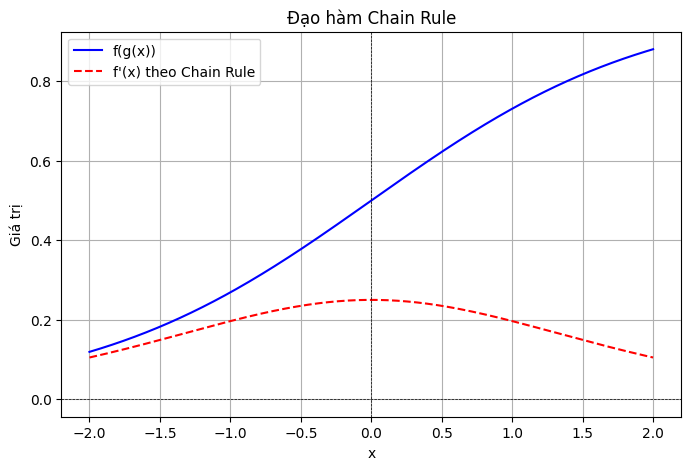

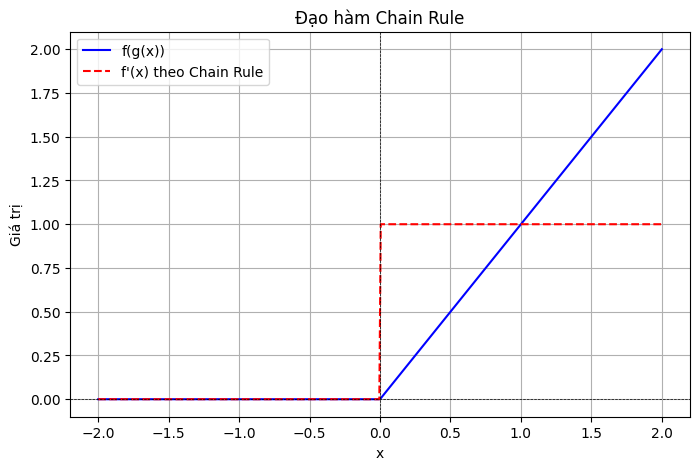

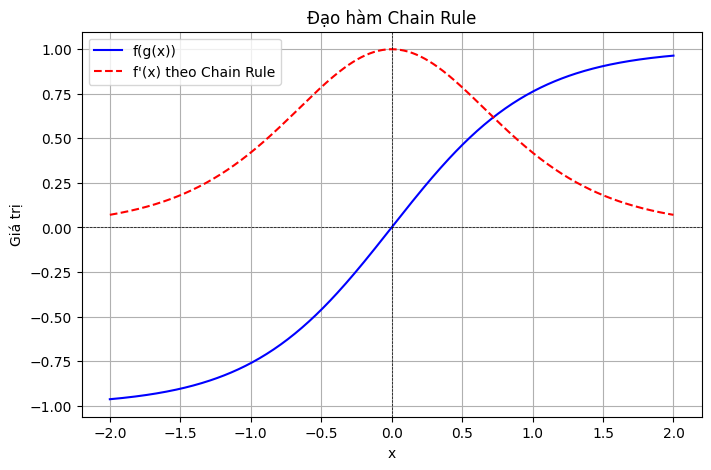

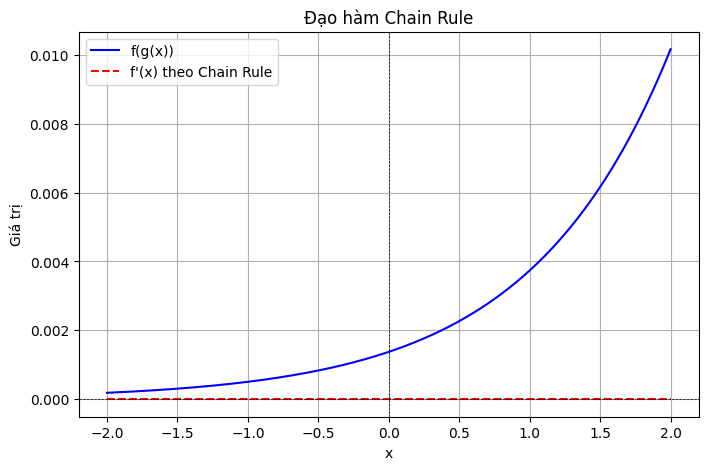

In [63]:
plot_chain_rule(sigmoid, lambda x:x)
plot_chain_rule(relu, lambda x:x)
plot_chain_rule(tanh, lambda x:x)
plot_chain_rule(softmax, lambda x:x)